In [200]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [201]:
aaa = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/aaa.pkl')
bbb = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/bbb.pkl')
ccc = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/ccc.pkl')

In [202]:
aaa_original = aaa.copy()
bbb_original = bbb.copy()
ccc_original = ccc.copy()

aaa = aaa[:42233].copy()
bbb = bbb[:44684].copy()
ccc = ccc[:39739].copy()

In [203]:
def model_rf(X, y):
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X)
    y_train = y
    
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    
    rfModel = RandomForestRegressor(n_estimators=50, max_features=15, max_depth=50,# min_samples_split=3,min_samples_leaf=2,
                                    verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(X_test)
    
#     y_pred = sc.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
    print(len(y_pred))
    
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("rmse : %.4f | r2 : %.4f \n" % (error, r2))
    
    return rfModel,y_pred,y_test

In [204]:
col_list = ['month', 'day', 'hour', 'minute', 'temperature_3H', 'sky', 'rainfall_probability', 'rainfall', 'snow',
            'humidity', 'wind_speed', 'wind_direction', 'dust_132', 'Elevation_angle', 'Azimuth_angle']

In [205]:
rf, pred, y_test = model_rf(aaa[col_list], aaa.solar1)

12670
rmse : 79.1580 | r2 : 0.9353 



[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [206]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace=True, drop=True)

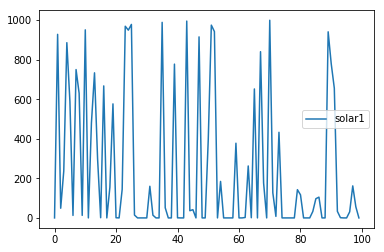

In [207]:
y_test[:100].plot()

In [208]:
pred = pd.DataFrame(pred)

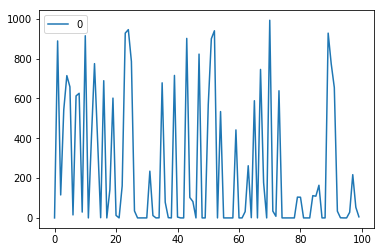

In [209]:
pred[:100].plot()

In [210]:
predict = pd.concat([pred, y_test], axis=1)

In [211]:
predict.head()

,0,solar1
0,0.000003,0
1,888.929576,927.795
2,115.390686,48.909
3,543.214655,236.881
4,714.677879,885.739


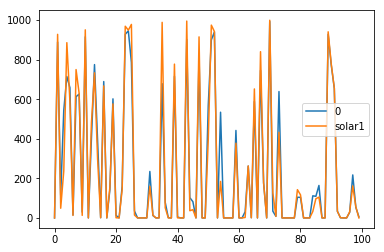

In [212]:
predict[:100].plot()

In [226]:
def solar(X, y):
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X)
    y_train = y

    rfModel = RandomForestRegressor(n_estimators=50, max_features=15, max_depth=50,# min_samples_split=3,min_samples_leaf=2,
                                verbose=1, random_state=0)
    rfModel = rfModel.fit(X_train, y_train)
    
    return rfModel

In [227]:
aaa_solar = solar(aaa[col_list], aaa.solar1)
bbb_solar = solar(bbb[col_list], bbb.solar1)
ccc_solar = solar(ccc[col_list], ccc.solar1)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.0s finished


In [228]:
forecast_final = pd.read_pickle('C:/Users/ewpadmin/KMS/forecast_final.pkl')

In [229]:
df_name = [aaa, bbb, ccc]
for col in df_name:
    col.Elevation_angle = col.Elevation_angle.astype('category')
    col.Azimuth_angle = col.Azimuth_angle.astype('category')

In [230]:
forecast_final.rainfall = forecast_final.rainfall.abs()
forecast_final.snow = forecast_final.snow.abs()

In [231]:
forecast_final[col_list].head(3)

,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,dust_132,Elevation_angle,Azimuth_angle
0,2,19,9,0,-1.0,4.0,70.0,2.3,2.3,100.0,4.0,1.0,33.000000,17.92,120.31
1,2,19,9,15,-1.0,4.0,64.8,2.0,2.0,100.8,3.9,1.0,32.993138,20.47,123.12
2,2,19,9,30,-1.0,4.0,59.9,1.8,1.8,101.5,3.9,1.0,32.987523,22.93,126.05


In [235]:
forecast_final_aaa = forecast_final.copy()
forecast_final_bbb = forecast_final.copy()
forecast_final_ccc = forecast_final.copy()

In [237]:
forecast_final_aaa['solar1'] = aaa_solar.predict(forecast_final[col_list])
forecast_final_bbb['solar1'] = bbb_solar.predict(forecast_final[col_list])
forecast_final_ccc['solar1'] = ccc_solar.predict(forecast_final[col_list])

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [242]:
col_list2 = ['solar1', 'month',
       'day', 'hour', 'minute', 'temperature_3H', 'sky',
       'rainfall_probability', 'rainfall', 'snow', 'humidity', 'wind_speed',
       'wind_direction', 'Elevation_angle', 'Azimuth_angle', 'dust_132']

In [243]:
def model_rf2(X, y, test_dataset, site):
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X)
    test_dataset = sc.transform(test_dataset)
    y_train = y
#     y_train = sc.fit_transform(y)

    
    rfModel = RandomForestRegressor(n_estimators=25, max_features=10, max_depth=25,# min_samples_split=3,min_samples_leaf=2,
                                    verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(test_dataset)
    
#     y_pred = sc.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
    print(len(y_pred))
    return rfModel,y_pred

In [244]:
aaa[col_list2].head()

,solar1,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
0,0,7,1,0,15,22.333333,3.916667,29.166667,0.416667,0.083333,93.333333,0.641667,7,-29.63,354.00,19.982090
1,0,7,1,0,30,22.666667,3.833333,28.333333,0.833333,0.166667,91.666667,0.683333,7,-29.84,357.96,21.713389
2,0,7,1,0,45,23.000000,3.750000,27.500000,1.250000,0.250000,90.000000,0.725000,7,-29.84,1.93,24.087994
3,0,7,1,1,0,23.333333,3.666667,26.666667,1.666667,0.333333,88.333333,0.766667,7,-29.64,5.90,26.000000
4,0,7,1,1,15,23.666667,3.583333,25.833333,2.083333,0.416667,86.666667,0.808333,7,-29.23,9.83,27.449408


In [245]:
forecast_final_aaa[col_list2].head()

,solar1,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
0,684.640947,2,19,9,0,-1.0,4.0,70.0,2.3,2.3,100.0,4.0,1.0,17.92,120.31,33.000000
1,634.894588,2,19,9,15,-1.0,4.0,64.8,2.0,2.0,100.8,3.9,1.0,20.47,123.12,32.993138
2,634.894588,2,19,9,30,-1.0,4.0,59.9,1.8,1.8,101.5,3.9,1.0,22.93,126.05,32.987523
3,634.894588,2,19,9,45,-0.9,4.0,55.4,1.6,1.6,102.0,3.9,1.0,25.30,129.12,32.983156
4,684.640947,2,19,10,0,-0.9,4.0,51.2,1.4,1.4,102.4,3.8,1.0,27.57,132.35,32.980037


In [246]:
modela,pre_aaa = model_rf2(aaa[col_list2], aaa[[aaa.columns[3]]], forecast_final_aaa[col_list2], 'A_site')
modelb,pre_bbb = model_rf2(bbb[col_list2], bbb[[bbb.columns[3]]], forecast_final_bbb[col_list2], 'B_site')
modelc,pre_ccc = model_rf2(ccc[col_list2], ccc[[ccc.columns[3]]], forecast_final_ccc[col_list2], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


253


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


253
253


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


<BarContainer object of 16 artists>

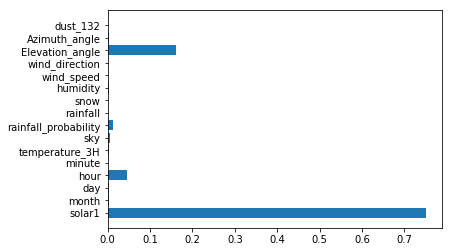

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline
yyyy = modela.feature_importances_
plt.barh(col_list2,yyyy)

In [250]:
pred_idx = pd.date_range(start='2019-02-19 09:00:00', end='2019-02-22 00:00:00', freq='15Min')
len(pd.date_range(start='2019-02-19 09:00:00', end='2019-02-22 00:00:00', freq='15Min'))

253

In [251]:
predict = pd.concat([pd.DataFrame(pre_aaa, columns=['A_site'], index=pred_idx),
                     pd.DataFrame(pre_bbb, columns=['B_site'], index=pred_idx),
                     pd.DataFrame(pre_ccc, columns=['C_site'], index=pred_idx)], axis=1)

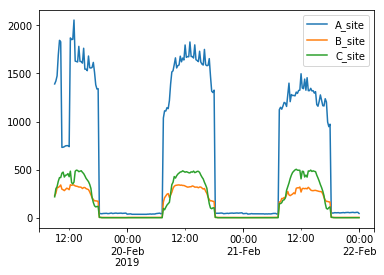

In [252]:
%matplotlib inline
predict.plot()

In [253]:
aaa_original.set_index(aaa_original.time, inplace=True)
bbb_original.set_index(bbb_original.time, inplace=True)
ccc_original.set_index(ccc_original.time, inplace=True)

In [254]:
A_site = pd.concat([pd.DataFrame(aaa_original[42269:42522].real_time_power),
           pd.DataFrame(predict.A_site)], axis=1)
A_site.columns = ['ACT', 'PRE']

B_site = pd.concat([pd.DataFrame(bbb_original[39061:39314].real_time_power),
           pd.DataFrame(predict.B_site)], axis=1)
B_site.columns = ['ACT', 'PRE']

C_site = pd.concat([pd.DataFrame(ccc_original[31232:31485].real_time_power),
           pd.DataFrame(predict.C_site)], axis=1)
C_site.columns = ['ACT', 'PRE']

(<matplotlib.axes._subplots.AxesSubplot at 0x236421060b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2364244fac8>)

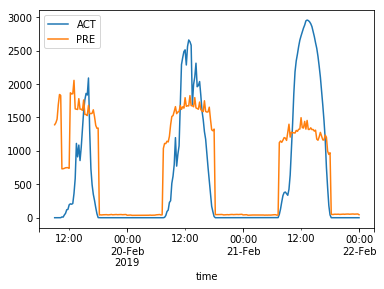

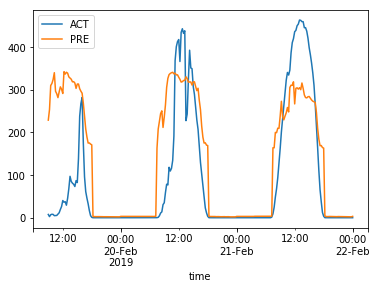

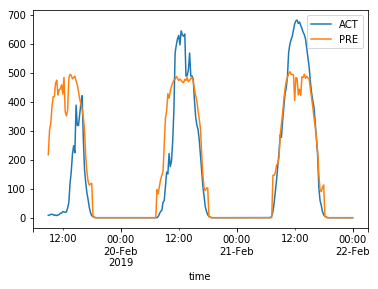

In [255]:
A_site.plot(), B_site.plot(), C_site.plot()